In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

RAW_DATA_DIR = Path('../raw_data/')
DATA_DIR = Path('../data/')

In [8]:
# TODO: fix indices

renewals_t = pd.read_csv(DATA_DIR / 'renewals_totals.csv', index_col=0, dtype={'ZIP Code': str})
renewals_t.head()

,ZIP Code,New,Renewed,Expiring,Insured-Initiated Nonrenewed,Insurer-Initiated Nonrenewed,Pct NonRenewed,Pct NonRenewed Owner,Pct NonRenewed Company
0,90001,5348,37886,42472,2974,1612,0.107977,0.070023,0.037954
1,90002,5837,37321,42395,3444,1630,0.119684,0.081236,0.038448
2,90003,7701,45684,52348,4529,2135,0.127302,0.086517,0.040785
3,90004,3779,27340,31023,2883,800,0.118718,0.092931,0.025787
4,90005,914,5874,6799,691,234,0.136049,0.101633,0.034417


In [9]:
zipcodes = gpd.read_file(DATA_DIR / 'CA_zipcodes.geojson')

In [10]:
zipcodes.rename(columns={'ZIP_CODE': 'ZIP Code'}, inplace=True)

In [11]:
renewals_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1701 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ZIP Code                      1701 non-null   object 
 1   New                           1701 non-null   int64  
 2   Renewed                       1701 non-null   int64  
 3   Expiring                      1701 non-null   int64  
 4   Insured-Initiated Nonrenewed  1701 non-null   int64  
 5   Insurer-Initiated Nonrenewed  1701 non-null   int64  
 6   Pct NonRenewed                1701 non-null   float64
 7   Pct NonRenewed Owner          1701 non-null   float64
 8   Pct NonRenewed Company        1701 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 132.9+ KB


In [13]:
merged = pd.merge(zipcodes, renewals_t, on='ZIP Code')

<Axes: >

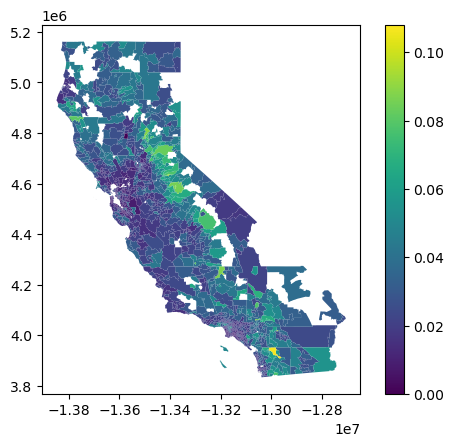

In [18]:
merged.plot(column='Pct NonRenewed Company', legend=True)